In [ ]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/FazlyRabbiBD/Consultancy/main/BUETwaterModel.csv')

In [ ]:
df

,Day,Month,Year,Date,T,Q,C,SSC
0,28,9,2015,9/28/2015,19.4,4.80,810,10
1,8,8,2016,8/8/2016,21.6,4.90,790,12
2,23,9,1998,9/23/1998,8.2,5.03,780,17
3,2,9,1998,9/2/1998,8.1,5.10,720,17
4,9,9,1998,9/9/1998,8.1,5.17,710,11
...,...,...,...,...,...,...,...,...
465,22,2,2016,2/22/2016,1.9,160.00,400,33
466,16,5,2011,5/16/2011,12.5,161.90,516,42
467,24,4,1996,4/24/1996,7.8,165.00,570,37
468,4,3,2002,3/4/2002,8.2,171.00,579,29


In [ ]:
df.sort_values(by=['Date'])

,Day,Month,Year,Date,T,Q,C,SSC
179,10,1,2001,1/10/2001,8.1,18.50,834,8
351,10,1,2005,1/10/2005,7.9,51.60,678,7
116,11,1,1995,1/11/1995,7.7,10.50,864,7
225,14,1,2002,1/14/2002,8.0,24.30,693,7
430,14,1,2008,1/14/2008,4.1,89.00,700,27
...,...,...,...,...,...,...,...,...
26,8,9,2003,9/8/2003,8.4,6.44,736,16
442,8,9,2014,9/8/2014,18.6,107.36,450,37
4,9,9,1998,9/9/1998,8.1,5.17,710,11
33,9,9,2002,9/9/2002,8.1,6.86,695,3


In [ ]:
df['SSC'].mean()

13.736170212765957

In [ ]:
data = df[["T", "Q", "C", "SSC"]]

In [ ]:
data[0:6]

,T,Q,C,SSC
0,19.4,4.80,810,10
1,21.6,4.90,790,12
2,8.2,5.03,780,17
3,8.1,5.10,720,17
4,8.1,5.17,710,11
5,8.1,5.46,480,9


## Lasso Model 

In [ ]:
from numpy import arange
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold

#define predictor and response variables
X = data[["T", "Q", "C"]]
y = data["SSC"]

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model1 = LassoCV(alphas=arange(0, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
model1.fit(X, y)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:644: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8585.989126932

LassoCV(alphas=array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1), n_jobs=-1)

In [ ]:
#define new observation
new = [18.5, 4.20, 680]

#predict hp value using lasso regression model
model1.predict([new])


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  "X does not have valid feature names, but"


array([10.0963419])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
model1.fit(x_train, y_train)

NameError: ignored

In [ ]:
predictions = model1.predict(x_test)
print('Coefficients:', model1.coef_)
print('Intercept:', model1.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = model1.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))

Coefficients: [ 0.09171595  0.14879692 -0.00303855]
Intercept: 9.336404105272141
MAE: 4.6381036784307454
MSE: 39.360925980195034
RMSE: 6.273828654035352
AccuracyII: 37.817793307286806 %
R2: 0.37817793307286807


## Elastic *Net* Model

In [ ]:
from sklearn.linear_model import ElasticNet

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)

#fit model
model.fit(X, y)


ElasticNet()

In [ ]:
from sklearn.model_selection import cross_val_score
from numpy import absolute
from numpy import mean
from numpy import std

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 4.765 (0.452)


In [ ]:
#define new observation
new = [18.5, 4.20, 680]

#predict hp value using lasso regression model
model.predict([new])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  "X does not have valid feature names, but"


array([9.87882736])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
model.fit(x_train, y_train)

ValueError: ignored

In [ ]:
predictions = model.predict(x_test)
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
accuracy = model.score(x_test,y_test)
print('AccuracyII:',accuracy*100,'%')
print('R2:', r2_score(y_test, predictions))

Coefficients: [ 0.06826406  0.14765051 -0.00298177]
Intercept: 9.557802749124207
MAE: 4.6480374607184824
MSE: 39.529448214139656
RMSE: 6.287244882628611
AccuracyII: 37.55156267062102 %
R2: 0.3755156267062102


## LSTM

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/FazlyRabbiBD/Consultancy/main/BUETwaterModel.csv',index_col='Date',parse_dates=True)


In [ ]:
df.head()

,Day,Month,Year,T,Q,C,SSC
Date,,,,,,,
2015-09-28,28,9,2015,19.4,4.80,810,10
2016-08-08,8,8,2016,21.6,4.90,790,12
1998-09-23,23,9,1998,8.2,5.03,780,17
1998-09-02,2,9,1998,8.1,5.10,720,17
1998-09-09,9,9,1998,8.1,5.17,710,11


In [ ]:
# sort the entire data according to date value
#df["Date"] = pd.to_datetime(df["Date"])

df = df.sort_values(by="Date")

In [ ]:
df.head(),df.tail()

(            Day  Month  Year    T      Q    C  SSC
 Date                                              
 1993-08-09    9      8  1993  7.8   9.73  590   11
 1993-10-27   27     10  1993  8.1  17.60  686   10
 1993-11-30   30     11  1993  7.7  60.10  702   22
 1993-12-07    7     12  1993  7.7  59.80  698   26
 1994-01-05    5      1  1994  7.8  12.40  825    8,
             Day  Month  Year     T     Q    C  SSC
 Date                                              
 2016-09-19   19      9  2016  19.7   8.1  660   14
 2016-10-24   24     10  2016  12.0  14.5  520   12
 2016-11-21   21     11  2016   4.1   9.0  740   10
 2016-12-05    5     12  2016   4.4  22.8  500   14
 2018-04-16   16      4  2018  11.2  46.2  460    7)

In [ ]:
data = df.drop(['Day', 'Month','Year','T','Q','C'], axis=1)

data.head()

,SSC
Date,
2015-09-28,10
2016-08-08,12
1998-09-23,17
1998-09-02,17
1998-09-09,11


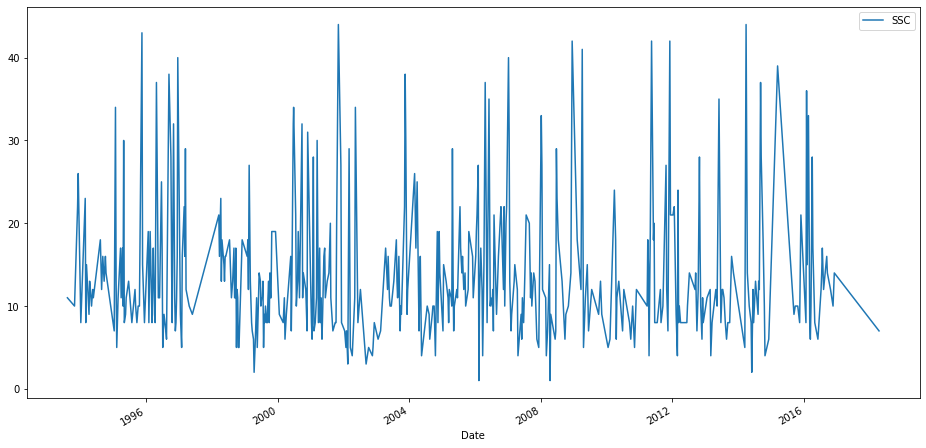

In [ ]:
data.plot(figsize=(16,8))

In [ ]:
len(data)

470

In [ ]:
train = data.iloc[:458]
test = data.iloc[458:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
#convert ssc to a numerical value range from 0 to 1 for better calculation
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.20930233],
       [0.25581395],
       [0.37209302],
       [0.37209302],
       [0.23255814],
       [0.18604651],
       [0.1627907 ],
       [0.09302326],
       [0.37209302],
       [0.44186047]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

# define generator
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.23255814 0.20930233 0.48837209]
Predict this y: 
 [[0.58139535]]


In [ ]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
446/446 [==============================] - 4s 6ms/step - loss: 0.0392
Epoch 2/50
446/446 [==============================] - 3s 6ms/step - loss: 0.0387
Epoch 3/50
446/446 [==============================] - 3s 6ms/step - loss: 0.0387
Epoch 4/50
446/446 [==============================] - 3s 6ms/step - loss: 0.0379
Epoch 5/50
446/446 [==============================] - 3s 6ms/step - loss: 0.0378
Epoch 6/50
446/446 [==============================] - 3s 6ms/step - loss: 0.0377
Epoch 7/50
446/446 [==============================] - 3s 6ms/step - loss: 0.0372
Epoch 8/50
446/446 [==============================] - 3s 6ms/step - loss: 0.0375
Epoch 9/50
446/446 [==============================] - 3s 6ms/step - loss: 0.0375
Epoch 10/50
446/446 [==============================] - 3s 6ms/step - loss: 0.0366
Epoch 11/50
446/446 [==============================] - 3s 8ms/step - loss: 0.0370
Epoch 12/50
446/446 [==============================] - 3s 6ms/step - loss: 0.0366
Epoch 13/50
446/446 [====

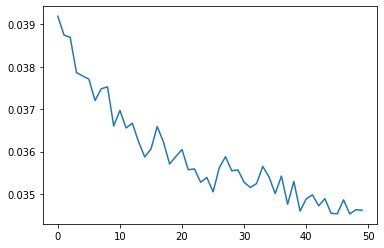

In [ ]:
#ploting loss
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
model.predict(last_train_batch)

array([[0.28211808]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.1627907])

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.28211808], dtype=float32),
 array([0.2558022], dtype=float32),
 array([0.26454607], dtype=float32),
 array([0.38114387], dtype=float32),
 array([0.3033568], dtype=float32),
 array([0.37001726], dtype=float32),
 array([0.28738123], dtype=float32),
 array([0.2536092], dtype=float32),
 array([0.29106975], dtype=float32),
 array([0.35154605], dtype=float32),
 array([0.2931947], dtype=float32),
 array([0.28912154], dtype=float32)]

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions

rmse=sqrt(mean_squared_error(test['SSC'],test['Predictions']))
print(rmse)

4.076452890936214


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
mse = mean_squared_error(test['SSC'],test['Predictions'])
print(mse)

20.403425897051196


In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(test['SSC'],test['Predictions']))
print('MSE:', metrics.mean_squared_error(test['SSC'],test['Predictions']))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test['SSC'],test['Predictions'])))
print('R2:', r2_score(test['SSC'], test['Predictions']))

MAE: 3.496365301311016
MSE: 16.617468172022217
RMSE: 4.076452890936214
R2: -0.49184252915910176


In [ ]:
test

,SSC,Predictions
Date,,
2016-05-02,8,13.131078
2016-06-06,6,11.999495
2016-07-11,12,12.375481
2016-07-18,14,17.389186
2016-07-25,17,14.044342
2016-08-08,12,16.910742
2016-09-12,16,13.357393
2016-09-19,14,11.905196
2016-10-24,12,13.515999


In [ ]:
score = model.evaluate(test['SSC'], test['Predictions'], verbose = 1) 


print('Test accuracy:', score)

1/1 [==============================] - 0s 28ms/step - loss: 190.9772
Test accuracy: 190.9771728515625


In [ ]:
yPred

array([13.13107753, 11.99949521, 12.37548086, 17.38918632, 14.04434225,
       16.91074219, 13.35739297, 11.90519604, 13.51599908, 16.11648011,
       13.60737258, 13.43222615])

# NEW

In [ ]:
df = data.sort_values(by="Date")

In [ ]:
df.head(), df.tail()

(            SSC
 Date           
 1993-08-09   11
 1993-10-27   10
 1993-11-30   22
 1993-12-07   26
 1994-01-05    8,             SSC
 Date           
 2016-09-19   14
 2016-10-24   12
 2016-11-21   10
 2016-12-05   14
 2018-04-16    7)

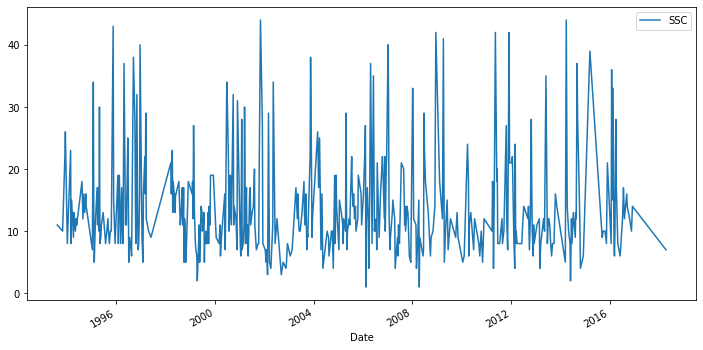

In [ ]:
df.plot(figsize=(12,6))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

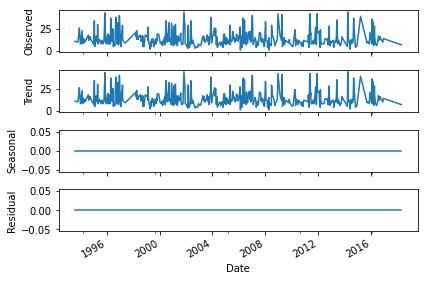

In [ ]:
results = seasonal_decompose(x=df['SSC'],model='additive', freq=1)
results.plot();

In [ ]:
len(df)

470

In [ ]:
train = df.iloc[:460]   #take first 460 data 
test = df.iloc[460:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train)  # Compute the mean and std to be used for later scaling.
# first fit the data and then transfrom it.
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [ ]:
scaled_train[:10]

array([[0.23255814],
       [0.20930233],
       [0.48837209],
       [0.58139535],
       [0.1627907 ],
       [0.51162791],
       [0.1627907 ],
       [0.3255814 ],
       [0.18604651],
       [0.27906977]])

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

TimeseriesGenerator that can be used to automatically transform a univariate or multivariate time series dataset into a supervised learning problem.

There are two parts to using the TimeseriesGenerator: defining it and using it to train models.

In [ ]:
n_input = 12         # take 12 month as an input to predict the next value
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential() #layers are adding one after another in a sequestial manner

model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features))) # add LSTM layer with 100 neuron and the activation function as relu activation
#function. last part define the input shape of the data

model.add(Dense(1)) # output layer

model.compile(optimizer='adam', loss='mse') #compile model using adam optimizer and mse loss function

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit(generator,epochs=50)

Epoch 1/50
448/448 [==============================] - 6s 8ms/step - loss: 0.0392
Epoch 2/50
448/448 [==============================] - 3s 7ms/step - loss: 0.0386
Epoch 3/50
448/448 [==============================] - 3s 7ms/step - loss: 0.0378
Epoch 4/50
448/448 [==============================] - 3s 7ms/step - loss: 0.0376
Epoch 5/50
448/448 [==============================] - 3s 7ms/step - loss: 0.0378
Epoch 6/50
448/448 [==============================] - 3s 6ms/step - loss: 0.0370
Epoch 7/50
448/448 [==============================] - 3s 7ms/step - loss: 0.0376
Epoch 8/50
448/448 [==============================] - 3s 7ms/step - loss: 0.0371
Epoch 9/50
448/448 [==============================] - 3s 7ms/step - loss: 0.0365
Epoch 10/50
448/448 [==============================] - 3s 6ms/step - loss: 0.0369
Epoch 11/50
448/448 [==============================] - 3s 7ms/step - loss: 0.0363
Epoch 12/50
448/448 [==============================] - 3s 7ms/step - loss: 0.0364
Epoch 13/50
448/448 [====

In [ ]:
last_train_batch = scaled_train[-12:] #taking last 12 value from my training set to make prediction of the 1st value of test set

last_train_batch = last_train_batch.reshape((1, n_input, n_features))

pred = model.predict(last_train_batch)

The reshape() function when called on an array takes one argument which is a tuple defining the new shape of the array. We cannot pass in any tuple of numbers; the reshape must evenly reorganize the data in the array.

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]    #take first 12 batch of input to predict the 13th value
    
    # append the prediction into the array
    test_predictions.append(current_pred)  # add the 13th value in the array 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) # create new 12 batch of input to predict the next value

In [ ]:
test_predictions

[array([0.26266944], dtype=float32),
 array([0.38317552], dtype=float32),
 array([0.32003123], dtype=float32),
 array([0.3681331], dtype=float32),
 array([0.3077576], dtype=float32),
 array([0.28028446], dtype=float32),
 array([0.28864646], dtype=float32),
 array([0.36721194], dtype=float32),
 array([0.31945235], dtype=float32),
 array([0.28903604], dtype=float32)]

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
test

,SSC,Predictions
Date,,
2016-07-11,12,12.294786
2016-07-18,14,17.476547
2016-07-25,17,14.761343
2016-08-08,12,16.829723
2016-09-12,16,14.233576
2016-09-19,14,13.052232
2016-10-24,12,13.411798
2016-11-21,10,16.790113
2016-12-05,14,14.736451


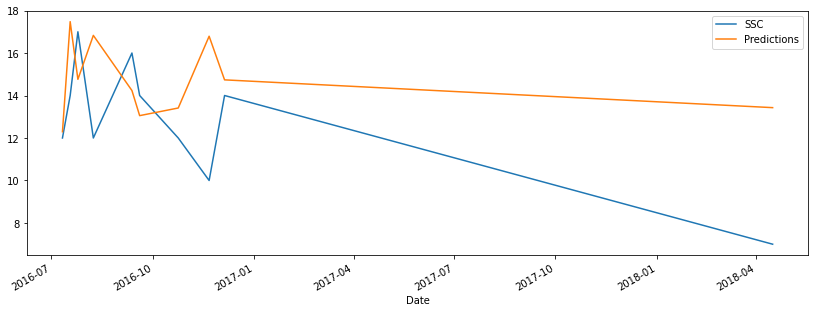

In [ ]:
test.plot(figsize=(14,5))

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(test['SSC'],test['Predictions']))
print('MSE:', metrics.mean_squared_error(test['SSC'],test['Predictions']))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test['SSC'],test['Predictions'])))
print('R2:', r2_score(test['SSC'], test['Predictions']))

MAE: 2.8920817345380785
MSE: 13.44970318775023
RMSE: 3.66738369791739
R2: -0.7790612682209301
